In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

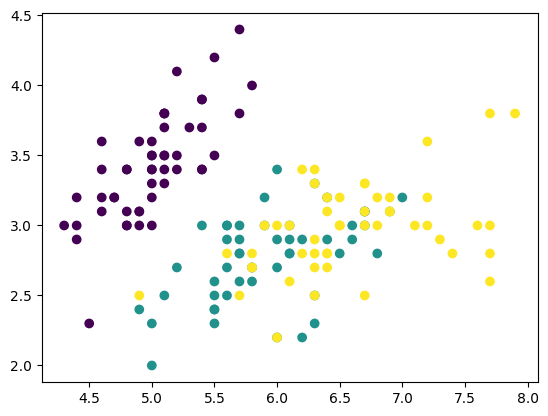

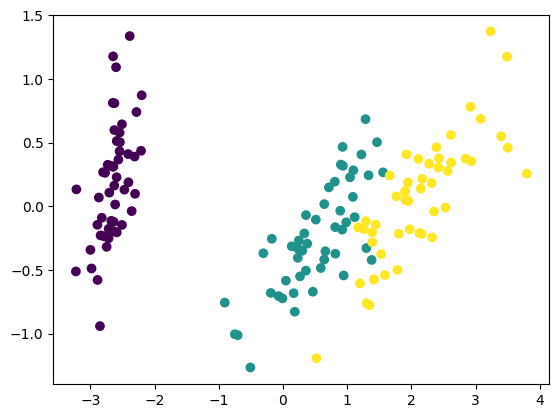

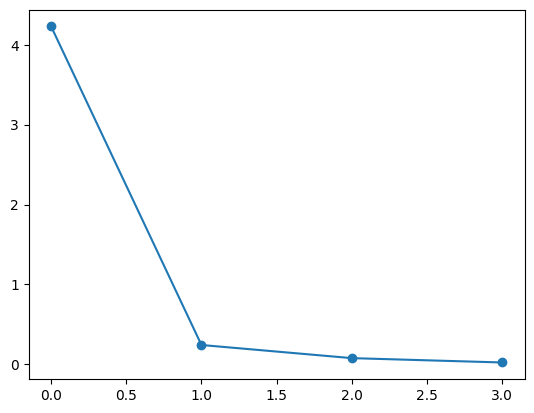

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=4)   

X = iris['data']
Y = pca.fit_transform(iris['data'])

plt.scatter(X[:,0], X[:,1], c=iris['target'])
plt.show()

plt.scatter(Y[:,0], Y[:,1], c=iris['target'])
plt.show()

plt.plot(pca.explained_variance_, "-o")
plt.show()

# plt.plot(range(1, 5), pca.explained_variance_, "-o")
# plt.show()

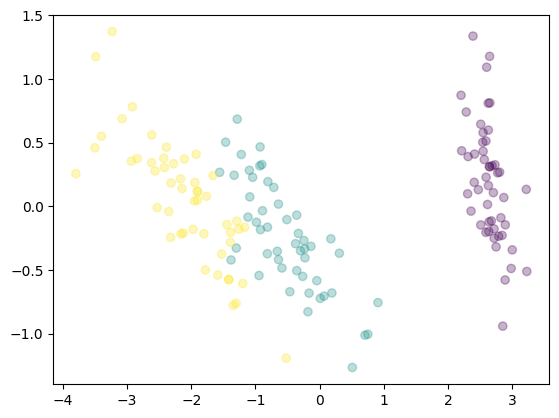

In [ ]:
#Eigen decomposition은 행렬을 벡터와 람다값으로 분해해준다?
#다만 행렬이 정사각형만 가능하다
#M = QlambdaQ(T)
from numpy import linalg
import matplotlib.pyplot as plt

X = iris['data']
X = X - X.mean(axis=0)

C = (X.T @ X) / X.shape[0]

#아이젠 함수 L, Q반환
L, Q = linalg.eigh(C)
Y = X @ Q

#L, Q의 3, 2번째를 고름
#3, 2번째를 고르는 이유는 아이젠 함수가 제일 큰 벡터를 뒤에 두기 때문이다.
plt.scatter(Y[:,3], Y[:,2],c=iris['target'], alpha=0.3)
plt.show()

#처음의 그래프와 반전되어서 나타나는 이유
#주성분이 선 위에 있는게 중요하지 어차피 분산 값은 똑같음. 즉 방향 자체는 중요하지 않다.


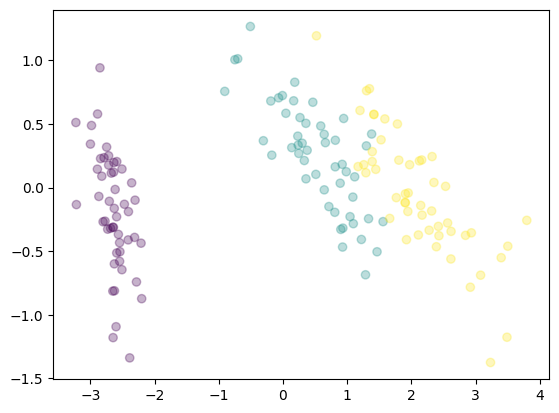

In [ ]:
#Singular Value Decomposition
#X = U Sigma V(T)
from numpy import linalg

X = iris['data']
X = X - X.mean(axis=0)

U, S, VT = linalg.svd(X)
Y = X @ VT.T

plt.scatter(Y[:,0], Y[:,1], c=iris['target'], alpha=0.3)
plt.show()

#S**2 / len(X)

In [ ]:
#power method => largest eigen value와 largest eigen vector를 구해준다.
#Mv = lambdav => lambda 값이 제일 클때의 v를 구해준다.
#Mv = v1이고 Mv1 = v2 이런식으로 계속 돌려가면서 구한다. 이걸 반복
#그럼 결국엔 하나의 벡터로 수렴을 하게됨
#이게 largest eigen vector로 수렴하게 된다.
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

X = iris['data']
X = X - X.mean(axis=0)

#공분산
C = (X.T @ X) / len(X)

M = C.copy()

L=[]
Q=[]

#정규화
v = np.random.randn(4, 1)
v /= linalg.norm(v)

#power method
for i in range(4):
    for _ in range(20):    
        vp = M @ v
        lmb = linalg.norm(vp)
        vp /= lmb
        v = vp
        
    M -= lmb * (v @ v.T)
    
    L.append(lmb)
    Q.append(v)

L = np.array(L)
Q = np.hstack(Q)

print(L, Q)

[4.20005343 0.24105294 0.0776881  0.02367619] [[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]


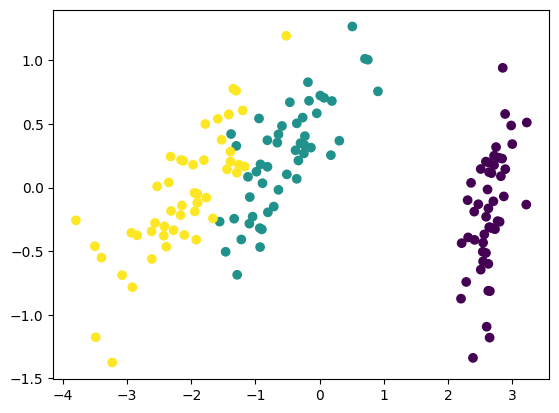

In [22]:
Y = X @ Q
plt.scatter(Y[:,0], Y[:,1], c=iris['target'])
plt.show()